Chapter 18

# 单特征贝叶斯分类
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码分析了鸢尾花数据集中 `Sepal length, $X_1$` 的分布及其在不同类别下的条件和联合概率。代码使用高斯核密度估计 (KDE) 对每个类别的条件概率密度函数、联合概率密度和后验概率密度进行了估计和可视化，遵循贝叶斯推断的基本步骤。以下是代码的详细流程：

1. **初始化数据与条件概率密度估计**：
   - 加载鸢尾花数据集，提取 `Sepal length, $X_1$` 和类别标签 $Y$。
   - 使用 KDE 计算 `X_1` 在每个类别下的条件概率密度 $f_{X1|Y}(x_1|C)$，其中 $C_1$、$C_2$、$C_3$ 分别代表鸢尾花的三种类别。具体计算了：
     $$
     f_{X1|Y}(x_1|C_i) \quad \text{for} \quad i = 1, 2, 3
     $$

2. **先验分布的计算与可视化**：
   - 通过计数每个类别的频率计算先验概率 $P(Y = C_i)$。将先验概率和先验分布绘制成条形图。
   
3. **联合概率密度估计**：
   - 根据贝叶斯公式，将条件概率密度和先验概率相乘，得到联合概率密度 $f_{X1,Y}(x_1, C_i)$：
     $$
     f_{X1,Y}(x_1, C_i) = f_{X1|Y}(x_1|C_i) \cdot P(Y = C_i)
     $$
   - 绘制不同类别下的联合概率密度曲线，并与条件概率曲线进行对比。

4. **证据分布的计算**：
   - 计算边际分布（即证据分布）$f_{X1}(x_1)$，作为不同类别联合分布的总和：
     $$
     f_{X1}(x_1) = f_{X1,Y}(x_1, C_1) + f_{X1,Y}(x_1, C_2) + f_{X1,Y}(x_1, C_3)
     $$
   - 使用证据分布与联合分布进行对比，以理解不同类别的贡献。

5. **后验概率密度估计**：
   - 计算后验概率密度，即给定 $x_1$ 下 $Y$ 属于不同类别的概率 $P(Y = C_i|X_1 = x_1)$，应用贝叶斯公式：
     $$
     f_{Y|X1}(C_i|x_1) = \frac{f_{X1,Y}(x_1, C_i)}{f_{X1}(x_1)}
     $$
   - 对 $f_{Y|X1}(C_i|x_1)$ 的后验概率密度进行可视化，以显示不同类别的相对概率。

6. **多图对比**：
   - 最后一步分别对比了后验、似然、边际（证据）和联合分布，用于验证贝叶斯公式的实现效果，并分析不同类别的概率密度变化。

## 导入所需的库

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

## 初始化

In [2]:
# 加载Iris数据集
iris = load_iris()

# 获取Iris数据集中前四个特征
X_1_to_4 = iris.data
y = iris.target  # 获取标签数据

# 定义特征名称
feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$',
                 'Petal length, $X_3$', 'Petal width, $X_4$']

# 创建特征数据的DataFrame
X_df = pd.DataFrame(X_1_to_4, columns=feature_names)

# 创建标签数据的DataFrame
y_df = pd.DataFrame(y, columns=['label'])

# 将标签数据值替换为C1、C2、C3
y_df[y_df == 0] = 'C_1'
y_df[y_df == 1] = 'C_2'
y_df[y_df == 2] = 'C_3'

# 提取“Sepal length, $X_1$”特征的数据
X1_df = X_df['Sepal length, $X_1$']

C:\Users\james\AppData\Local\Temp\ipykernel_7648\579008714.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'C_1' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  y_df[y_df == 0] = 'C_1'


## 给定类Y的条件下计算似然概率密度函数 (PDF)

In [3]:
# 在给定C1 (y=0)的条件下

# 创建x1范围用于生成数据
x1 = np.linspace(4, 8, 161)

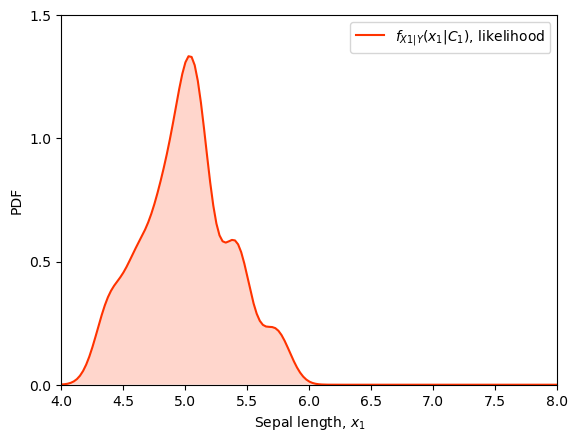

In [4]:
# 创建图形
fig, ax = plt.subplots()

# 估计给定C1的条件PDF
KDE_C1 = sm.nonparametric.KDEUnivariate(X1_df[y == 0])
KDE_C1.fit(bw=0.1)  # 设置带宽参数

# 计算给定C1的PDF值
f_x1_given_C1 = KDE_C1.evaluate(x1)

# 绘制条件PDF的填充图
ax.fill_between(x1, f_x1_given_C1, facecolor='#FF3300', alpha=0.2)
ax.plot(x1, f_x1_given_C1, color='#FF3300',
        label='$f_{X1|Y}(x_1|C_1)$, likelihood')

# 设置图形的自动缩放范围
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('PDF')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

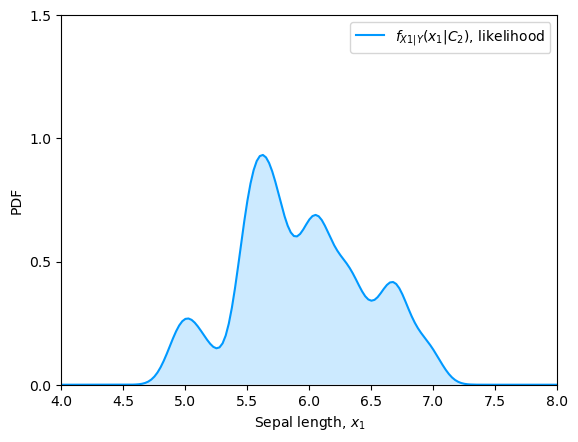

In [5]:
# 在给定C2 (y=1)的条件下

# 创建新的图形
fig, ax = plt.subplots()

# 估计给定C2的条件PDF
KDE_C2 = sm.nonparametric.KDEUnivariate(X1_df[y == 1])
KDE_C2.fit(bw=0.1)

# 计算给定C2的PDF值
f_x1_given_C2 = KDE_C2.evaluate(x1)

# 绘制条件PDF的填充图
ax.fill_between(x1, f_x1_given_C2, facecolor='#0099FF', alpha=0.2)
ax.plot(x1, f_x1_given_C2, color='#0099FF',
        label='$f_{X1|Y}(x_1|C_2)$, likelihood')

# 设置图形的自动缩放范围
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('PDF')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

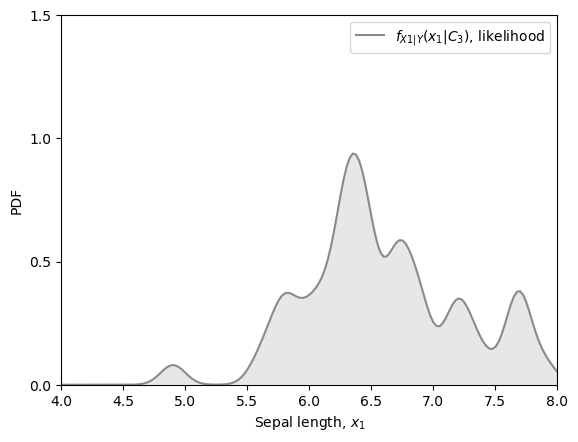

In [6]:
# 在给定C3 (y=2)的条件下

# 创建新的图形
fig, ax = plt.subplots()

# 估计给定C3的条件PDF
KDE_C3 = sm.nonparametric.KDEUnivariate(X1_df[y == 2])
KDE_C3.fit(bw=0.1)

# 计算给定C3的PDF值
f_x1_given_C3 = KDE_C3.evaluate(x1)

# 绘制条件PDF的填充图
ax.fill_between(x1, f_x1_given_C3, facecolor='#8A8A8A', alpha=0.2)
ax.plot(x1, f_x1_given_C3, color='#8A8A8A',
        label='$f_{X1|Y}(x_1|C_3)$, likelihood')

# 设置图形的自动缩放范围
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('PDF')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

## 比较三个条件PDF曲线

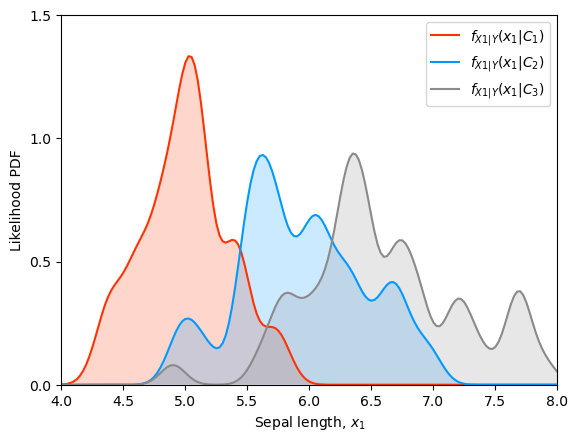

In [7]:
# 创建图形
fig, ax = plt.subplots()

# 绘制给定C1的条件PDF曲线
ax.fill_between(x1, f_x1_given_C1, facecolor='#FF3300', alpha=0.2)
ax.plot(x1, f_x1_given_C1, color='#FF3300', label='$f_{X1|Y}(x_1|C_1)$')

# 绘制给定C2的条件PDF曲线
ax.fill_between(x1, f_x1_given_C2, facecolor='#0099FF', alpha=0.2)
ax.plot(x1, f_x1_given_C2, color='#0099FF', label='$f_{X1|Y}(x_1|C_2)$')

# 绘制给定C3的条件PDF曲线
ax.fill_between(x1, f_x1_given_C3, facecolor='#8A8A8A', alpha=0.2)
ax.plot(x1, f_x1_given_C3, color='#8A8A8A', label='$f_{X1|Y}(x_1|C_3)$')

# 设置图形的自动缩放范围
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('Likelihood PDF')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

## 先验概率

In [8]:
# 计算标签数据的频数
y_counts = y_df.value_counts()

# 设置颜色
my_colors = ['#FF3300', '#0099FF', '#8A8A8A']

Text(0, 0.5, 'Count')

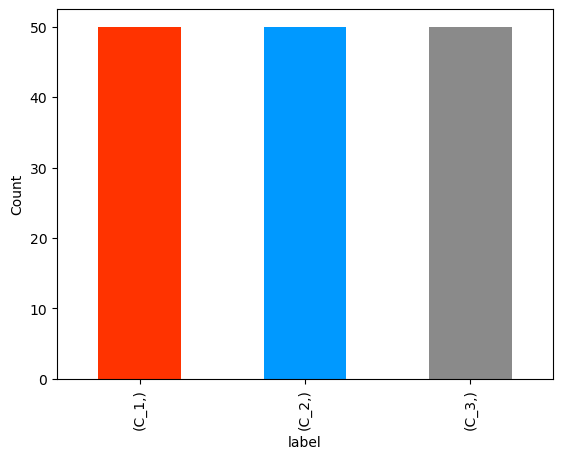

In [9]:
# 绘制条形图
fig, ax = plt.subplots()
y_counts.plot.bar(color=my_colors)

plt.ylabel('Count')

In [10]:
# 计算先验概率
y_prob = y_counts / y_df.count().values[0]

Text(0, 0.5, 'Prior probability')

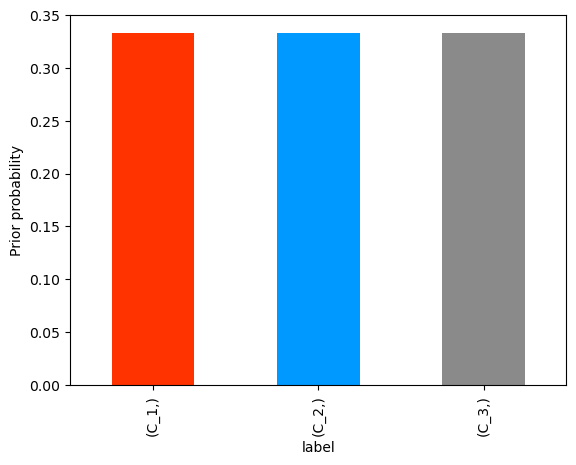

In [11]:
# 绘制先验概率条形图
fig, ax = plt.subplots()
y_prob.plot.bar(color=my_colors)
plt.ylabel('Prior probability')

## 联合PDF计算

In [12]:
f_x1_joint_C1 = f_x1_given_C1 * y_prob['C_1']  # 给定C1的联合PDF
f_x1_joint_C2 = f_x1_given_C2 * y_prob['C_2']  # 给定C2的联合PDF
f_x1_joint_C3 = f_x1_given_C3 * y_prob['C_3']  # 给定C3的联合PDF

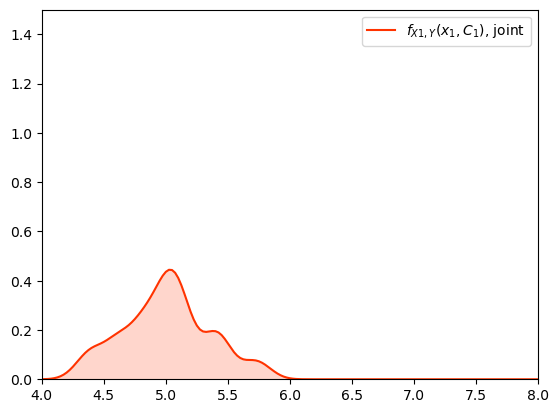

In [13]:
# 绘制给定C1的联合PDF图形
fig, ax = plt.subplots()
ax.plot(x1, f_x1_joint_C1, color='#FF3300', label='$f_{X1,Y}(x_1,C_1)$, joint')
ax.fill_between(x1, f_x1_joint_C1, facecolor='#FF3300', alpha=0.2)
ax.set_ylim([0, 1.5])
ax.set_xlim([4, 8])
ax.legend()

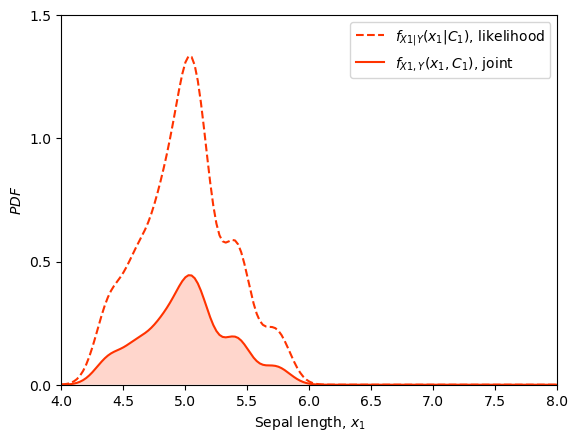

In [14]:
# C1 类的联合PDF绘制

fig, ax = plt.subplots()

# 绘制条件似然函数
ax.plot(x1, f_x1_given_C1, color='#FF3300', linestyle='--', 
        label='$f_{X1|Y}(x_1|C_1)$, likelihood')

# 绘制联合PDF
ax.fill_between(x1, f_x1_joint_C1, facecolor='#FF3300', alpha=0.2)
ax.plot(x1, f_x1_joint_C1, color='#FF3300', 
        label='$f_{X1,Y}(x_1,C_1)$, joint')

# 设置图形属性
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('$PDF$')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

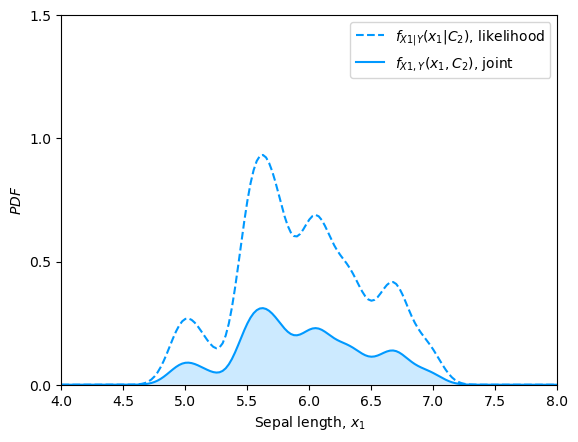

In [15]:
# C2 类的联合PDF绘制

fig, ax = plt.subplots()

# 绘制条件似然函数
ax.plot(x1, f_x1_given_C2, color='#0099FF', linestyle='--', 
        label='$f_{X1|Y}(x_1|C_2)$, likelihood')

# 绘制联合PDF
ax.fill_between(x1, f_x1_joint_C2, facecolor='#0099FF', alpha=0.2)
ax.plot(x1, f_x1_joint_C2, color='#0099FF', 
        label='$f_{X1,Y}(x_1,C_2)$, joint')

# 设置图形属性
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('$PDF$')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

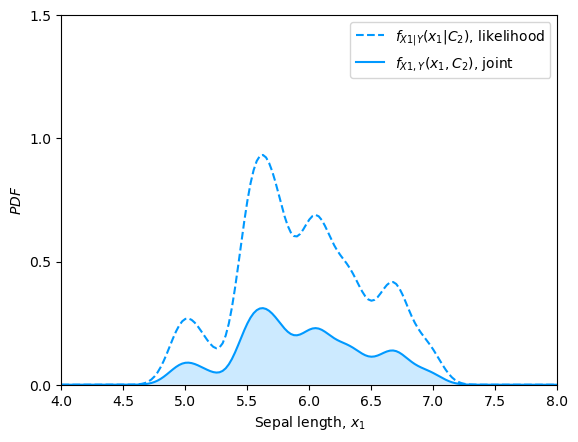

In [16]:
# C2 类的联合PDF绘制

fig, ax = plt.subplots()

# 绘制条件似然函数
ax.plot(x1, f_x1_given_C2, color='#0099FF', linestyle='--', 
        label='$f_{X1|Y}(x_1|C_2)$, likelihood')

# 绘制联合PDF
ax.fill_between(x1, f_x1_joint_C2, facecolor='#0099FF', alpha=0.2)
ax.plot(x1, f_x1_joint_C2, color='#0099FF', 
        label='$f_{X1,Y}(x_1,C_2)$, joint')

# 设置图形属性
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('$PDF$')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

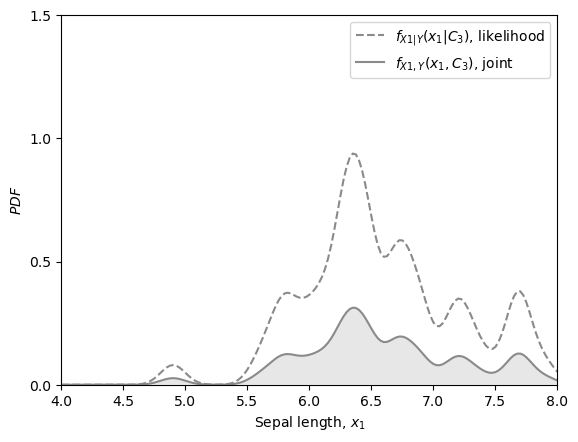

In [17]:
# C3 类的联合PDF绘制

fig, ax = plt.subplots()

# 绘制条件似然函数
ax.plot(x1, f_x1_given_C3, color='#8A8A8A', linestyle='--', 
        label='$f_{X1|Y}(x_1|C_3)$, likelihood')

# 绘制联合PDF
ax.fill_between(x1, f_x1_joint_C3, facecolor='#8A8A8A', alpha=0.2)
ax.plot(x1, f_x1_joint_C3, color='#8A8A8A', 
        label='$f_{X1,Y}(x_1,C_3)$, joint')

# 设置图形属性
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('$PDF$')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

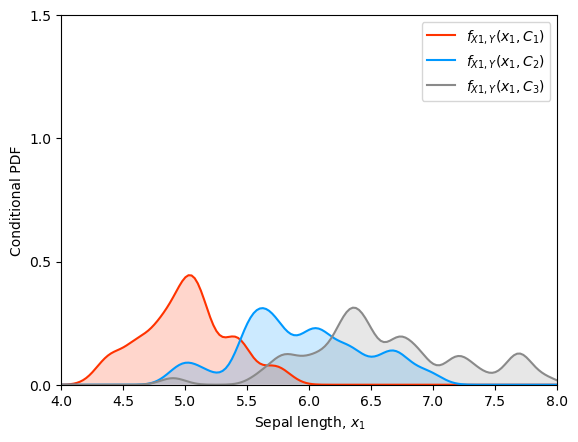

In [18]:
# 对比三个联合PDF

fig, ax = plt.subplots()

# 绘制C1的联合PDF
ax.fill_between(x1, f_x1_joint_C1, facecolor='#FF3300', alpha=0.2)
ax.plot(x1, f_x1_joint_C1, color='#FF3300', label='$f_{X1,Y}(x_1,C_1)$')

# 绘制C2的联合PDF
ax.fill_between(x1, f_x1_joint_C2, facecolor='#0099FF', alpha=0.2)
ax.plot(x1, f_x1_joint_C2, color='#0099FF', label='$f_{X1,Y}(x_1,C_2)$')

# 绘制C3的联合PDF
ax.fill_between(x1, f_x1_joint_C3, facecolor='#8A8A8A', alpha=0.2)
ax.plot(x1, f_x1_joint_C3, color='#8A8A8A', label='$f_{X1,Y}(x_1,C_3)$')

# 设置图形属性
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_ylabel('Conditional PDF')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

## 计算边际PDF f(X1)

In [19]:
f_x1 = f_x1_joint_C1 + f_x1_joint_C2 + f_x1_joint_C3  # 求和得到总边际PDF

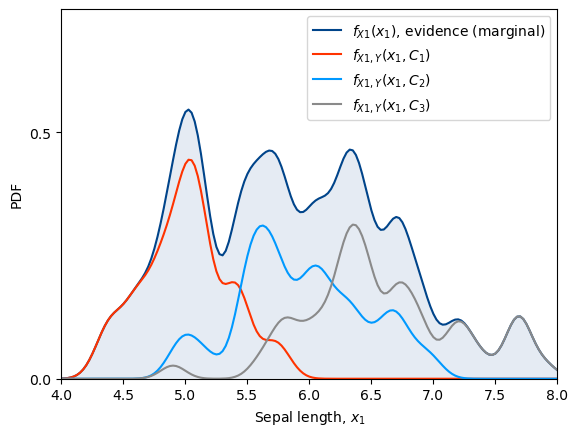

In [20]:
# 绘制边际PDF

fig, ax = plt.subplots()

# 绘制边际PDF
ax.plot(x1, f_x1, color='#00448A', label='$f_{X1}(x_1)$, evidence (marginal)')
ax.fill_between(x1, f_x1, facecolor='#00448A', alpha=0.1)

# 绘制每个类别的联合PDF
ax.plot(x1, f_x1_joint_C1, color='#FF3300', label='$f_{X1,Y}(x_1,C_1)$')
ax.plot(x1, f_x1_joint_C2, color='#0099FF', label='$f_{X1,Y}(x_1,C_2)$')
ax.plot(x1, f_x1_joint_C3, color='#8A8A8A', label='$f_{X1,Y}(x_1,C_3)$')

# 设置图形属性
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 0.75])
ax.set_yticks([0, 0.5])
ax.set_xlim([4, 8])
ax.set_ylabel('PDF')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

## 后验概率计算

In [21]:
f_C1_given_x1 = f_x1_joint_C1 / f_x1  # 类别C1的后验概率
f_C2_given_x1 = f_x1_joint_C2 / f_x1  # 类别C2的后验概率
f_C3_given_x1 = f_x1_joint_C3 / f_x1  # 类别C3的后验概率

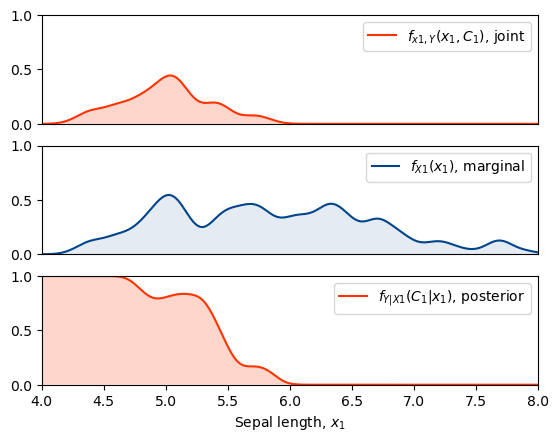

In [22]:
# 绘制C1的后验概率

fig, (ax1, ax2, ax3) = plt.subplots(3)

# 绘制联合PDF C1
ax1.plot(x1, f_x1_joint_C1, color='#FF3300',
         label='$f_{x1, Y}(x_1, C_1)$, joint')
ax1.fill_between(x1, f_x1_joint_C1, facecolor='#FF3300', alpha=0.2)
ax1.set_ylim([0, 1])
ax1.set_yticks([0, 0.5, 1])
ax1.set_xlim([4, 8])
ax1.set_xticks([])
ax1.legend()

# 绘制边际PDF
ax2.plot(x1, f_x1, color='#00448A', label='$f_{X1}(x_1)$, marginal')
ax2.fill_between(x1, f_x1, facecolor='#00448A', alpha=0.1)
ax2.set_ylim([0, 1])
ax2.set_yticks([0, 0.5, 1])
ax2.set_xlim([4, 8])
ax2.set_xticks([])
ax2.legend()

# 绘制C1的后验概率
ax3.fill_between(x1, f_C1_given_x1, facecolor='#FF3300', alpha=0.2)
ax3.plot(x1, f_C1_given_x1, color='#FF3300', label='$f_{Y|X1}(C_1|x_1)$, posterior')

# 设置图形属性
ax3.autoscale(enable=True, axis='x', tight=True)
ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim([0, 1])
ax3.set_yticks([0, 0.5, 1])
ax3.set_xlim([4, 8])
ax3.set_xlabel('Sepal length, $x_1$')
ax3.legend()

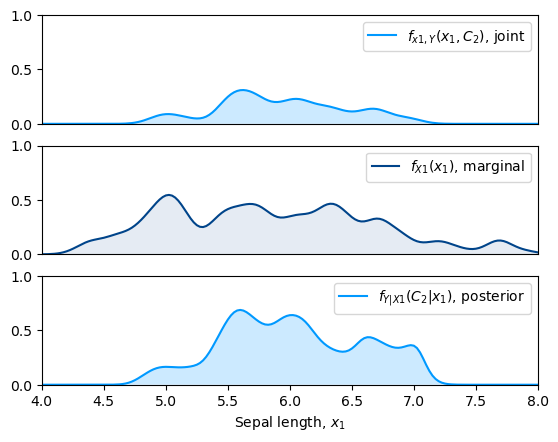

In [23]:
# C2

fig, (ax1, ax2, ax3) = plt.subplots(3)

# joint C2
ax1.plot(x1, f_x1_joint_C2,color = '#0099FF',
         label = '$f_{x1, Y}(x_1, C_2)$, joint')
ax1.fill_between(x1, f_x1_joint_C2, facecolor = '#0099FF',alpha = 0.2)
ax1.set_ylim([0,1])
ax1.set_yticks([0, 0.5, 1])
ax1.set_xlim([4,8])
ax1.set_xticks([])
ax1.legend()

# marginal, x1
ax2.plot(x1, f_x1, color = '#00448A',
                 label = '$f_{X1}(x_1)$, marginal')
ax2.fill_between(x1, f_x1, facecolor = '#00448A',alpha = 0.1)
ax2.set_ylim([0,1])
ax2.set_yticks([0, 0.5, 1])
ax2.set_xlim([4,8])
ax2.set_xticks([])
ax2.legend()

# given x1, probability of C2
ax3.fill_between(x1, f_C2_given_x1, facecolor = '#0099FF',alpha = 0.2)
ax3.plot(x1, f_C2_given_x1,color = '#0099FF',
         label = '$f_{Y|X1}(C_2|x_1)$, posterior')

ax3.autoscale(enable=True, axis='x', tight=True)
ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim([0,1])
ax3.set_yticks([0, 0.5, 1])
ax3.set_xlim([4,8])
ax3.set_xlabel('Sepal length, $x_1$')
ax3.legend()


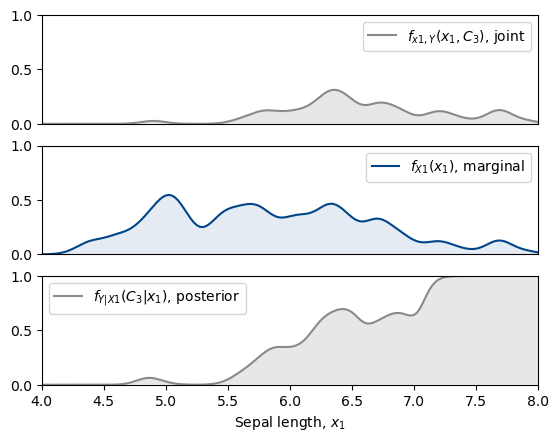

In [24]:
# C3

fig, (ax1, ax2, ax3) = plt.subplots(3)

# joint C3
ax1.plot(x1, f_x1_joint_C3,color = '#8A8A8A',
         label = '$f_{x1, Y}(x_1, C_3)$, joint')
ax1.fill_between(x1, f_x1_joint_C3, facecolor = '#8A8A8A',alpha = 0.2)
ax1.set_ylim([0,1])
ax1.set_yticks([0, 0.5, 1])
ax1.set_xlim([4,8])
ax1.set_xticks([])
ax1.legend()

# marginal, x1
ax2.plot(x1, f_x1, color = '#00448A',
                 label = '$f_{X1}(x_1)$, marginal')
ax2.fill_between(x1, f_x1, facecolor = '#00448A',alpha = 0.1)
ax2.set_ylim([0,1])
ax2.set_yticks([0, 0.5, 1])
ax2.set_xlim([4,8])
ax2.set_xticks([])
ax2.legend()

# given x1, probability of C3
ax3.fill_between(x1, f_C3_given_x1, facecolor = '#8A8A8A',alpha = 0.2)
ax3.plot(x1, f_C3_given_x1,color = '#8A8A8A',
         label = '$f_{Y|X1}(C_3|x_1)$, posterior')

ax3.autoscale(enable=True, axis='x', tight=True)
ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim([0,1])
ax3.set_yticks([0, 0.5, 1])
ax3.set_xlim([4,8])
ax3.set_xlabel('Sepal length, $x_1$')
ax3.legend()

## 对比三个后验概率曲线

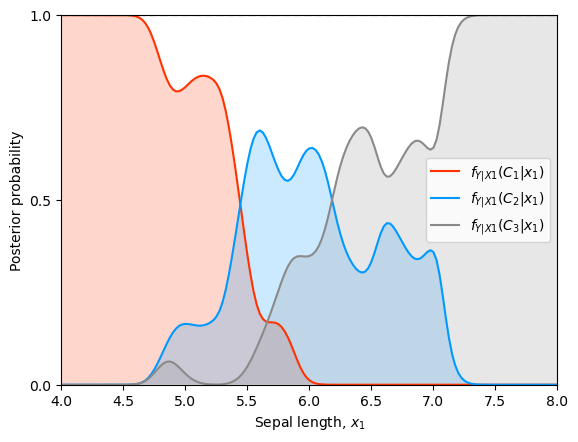

In [25]:
fig, ax = plt.subplots()

# 绘制C1的后验概率
ax.fill_between(x1, f_C1_given_x1, facecolor='#FF3300', alpha=0.2)
ax.plot(x1, f_C1_given_x1, color='#FF3300', label='$f_{Y|X1}(C_1|x_1)$')

# 绘制C2的后验概率
ax.fill_between(x1, f_C2_given_x1, facecolor='#0099FF', alpha=0.2)
ax.plot(x1, f_C2_given_x1, color='#0099FF', label='$f_{Y|X1}(C_2|x_1)$')

# 绘制C3的后验概率
ax.fill_between(x1, f_C3_given_x1, facecolor='#8A8A8A', alpha=0.2)
ax.plot(x1, f_C3_given_x1, color='#8A8A8A', label='$f_{Y|X1}(C_3|x_1)$')

# 设置图形属性
ax.axhline(y=1, color='k', linestyle='--')
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_xlim([4, 8])
ax.set_ylabel('Posterior probability')
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

## 比较后验、似然、边际和联合PDF

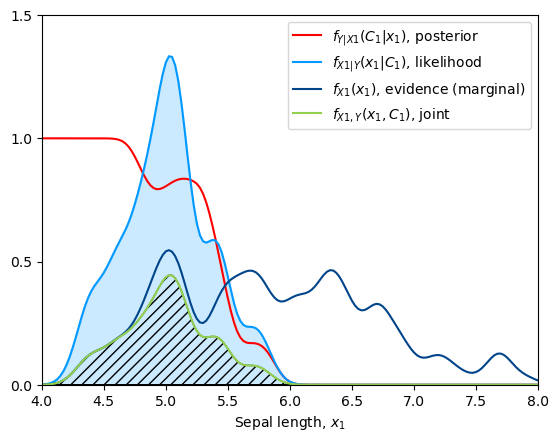

In [26]:
# 绘制C1类别的后验、似然、边际和联合PDF

fig, ax = plt.subplots()

# 绘制后验
ax.plot(x1, f_C1_given_x1, color='r', label='$f_{Y|X1}(C_1|x_1)$, posterior')

# 绘制似然
ax.plot(x1, f_x1_given_C1, color='#0099FF', label='$f_{X1|Y}(x_1|C_1)$, likelihood')
ax.fill_between(x1, f_x1_given_C1, alpha=0.2, color='#0099FF')

# 绘制边际（证据）
ax.plot(x1, f_x1, color='#00448A', label='$f_{X1}(x_1)$, evidence (marginal)')

# 绘制联合PDF
ax.plot(x1, f_x1_joint_C1, color='#92D050', label='$f_{X1,Y}(x_1,C_1)$, joint')
ax.fill_between(x1, f_x1_joint_C1, edgecolor='k', hatch='///', facecolor="none")

# 设置图形属性
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.5, 1, 1.5])
ax.set_xlim([4, 8])
ax.set_xlabel('Sepal length, $x_1$')
ax.legend()

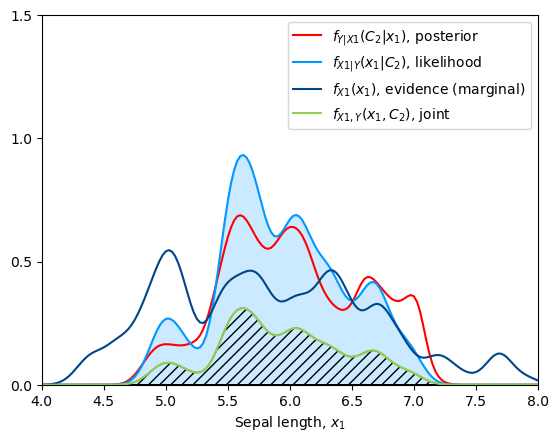

In [27]:
# C2 类别后验、似然、边际和联合PDF绘制

fig, ax = plt.subplots()

# 绘制后验
ax.plot(x1, f_C2_given_x1, color='r', label='$f_{Y|X1}(C_2|x_1)$, posterior')

# 绘制似然
ax.plot(x1, f_x1_given_C2, color='#0099FF', label='$f_{X1|Y}(x_1|C_2)$, likelihood')
ax.fill_between(x1, f_x1_given_C2, alpha=0.2, color='#0099FF')

# 绘制边际（证据）
ax.plot(x1, f_x1, color='#00448A', label='$f_{X1}(x_1)$, evidence (marginal)')

# 绘制联合PDF
ax.plot(x1, f_x1_joint_C2, color='#92D050', label='$f_{X1,Y}(x_1,C_2)$, joint')
ax.fill_between(x1, f_x1_joint_C2, edgecolor='k', hatch='///', facecolor="none")

# 设置图形属性
ax.set_ylim([0, 1.5])  # 设置y轴的范围
ax.set_yticks([0, 0.5, 1, 1.5])  # 设置y轴刻度
ax.set_xlim([4, 8])  # 设置x轴的范围
ax.set_xlabel('Sepal length, $x_1$')  # 设置x轴标签
ax.legend()  # 显示图例

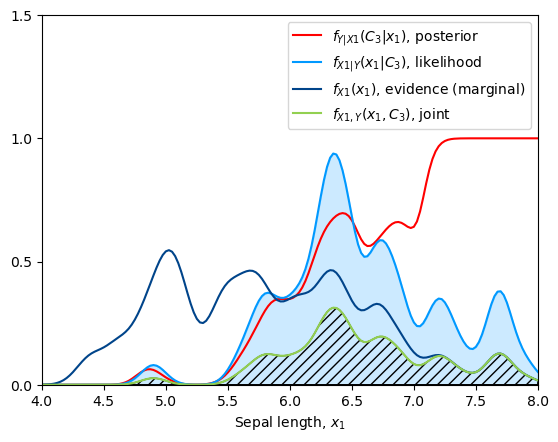

In [28]:
# C3 类别后验、似然、边际和联合PDF绘制

fig, ax = plt.subplots()

# 绘制后验
ax.plot(x1, f_C3_given_x1, color='r', label='$f_{Y|X1}(C_3|x_1)$, posterior')

# 绘制似然
ax.plot(x1, f_x1_given_C3, color='#0099FF', label='$f_{X1|Y}(x_1|C_3)$, likelihood')
ax.fill_between(x1, f_x1_given_C3, alpha=0.2, color='#0099FF')

# 绘制边际（证据）
ax.plot(x1, f_x1, color='#00448A', label='$f_{X1}(x_1)$, evidence (marginal)')

# 绘制联合PDF
ax.plot(x1, f_x1_joint_C3, color='#92D050', label='$f_{X1,Y}(x_1,C_3)$, joint')
ax.fill_between(x1, f_x1_joint_C3, edgecolor='k', hatch='///', facecolor="none")

# 设置图形属性
ax.set_ylim([0, 1.5])  # 设置y轴的范围
ax.set_yticks([0, 0.5, 1, 1.5])  # 设置y轴刻度
ax.set_xlim([4, 8])  # 设置x轴的范围
ax.set_xlabel('Sepal length, $x_1$')  # 设置x轴标签
ax.legend()  # 显示图例